[(418, 726, 973, 171)]


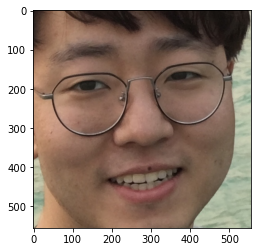

In [1]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/image/나.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

In [2]:
import face_recognition
import os

def get_gropped_face(image_file): #얼굴을 자르는 함수
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

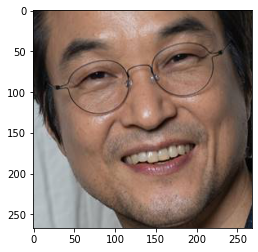

In [3]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/image/한석규.jpg' #예시로 가져와보기

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

In [4]:
import os #파일 나열

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/image'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['슈가.jpg', '이재용.jpg', '김C.jpg', '이제훈.jpg', '김정수.jpg', '송중기.jpg', '박신양.jpg', '박서준.jpg', 'NanumGothic.ttf', '배용준.jpg', '류승룡.jpg', '박재범.jpg', '류준열.jpg', '정형돈.jpg', '조원희.jpg', '택연.jpg', '유재석.jpg', '유지태.jpg', '진.jpg', '유해진.jpg', '로다주.jpg', '공유.jpg', '정우성.jpg', '강동원.jpg', '김희철.jpg', '이민호.jpg', '제이홉.jpg', '이광수.jpg', '백현.jpg', '조승우.jpg', '길.jpg', '첸.jpg', '김대명.jpg', '이동욱.jpg', '유희열.jpg', '마동석.jpg', '김민교.jpg', '곽도원.jpg', '남주혁.jpg', '유노윤호.jpg', '이승기.jpg', '현빈.jpg', '나.jpg', '최현석.jpg', '기성용.jpg', '정준하.jpg', '지민.jpg', '지코.jpg', '임시완.jpg', 'RM.jpg', '하현우.jpg', '한석규.jpg', '안재홍.jpg', '차승원.jpg', '박명수.jpg', '노홍철.jpg', '최민식.jpg', '정국.jpg', '이승환.jpg', '주진모.jpg', '황정민.jpg']


In [5]:
image_file = os.path.join(dir_path, '김정수.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding #임베딩 벡터 나열

[array([-7.33224228e-02,  1.27261326e-01,  4.93916087e-02, -5.00493534e-02,
        -9.12454650e-02, -3.23491804e-02, -5.06604910e-02, -1.29322231e-01,
         1.15727693e-01, -1.02550447e-01,  1.74928635e-01, -1.52907660e-02,
        -2.19186902e-01, -3.75029519e-02, -6.89755976e-02,  1.79757148e-01,
        -2.20070526e-01, -1.45718455e-01, -6.48929849e-02,  5.43744862e-03,
         1.09334163e-01,  2.77826283e-02,  1.34066949e-02,  9.61684622e-03,
        -9.92156416e-02, -2.97187358e-01, -6.81804568e-02, -6.87320456e-02,
        -5.18720597e-03,  2.00713007e-03, -3.47454660e-02,  4.08390835e-02,
        -1.31183997e-01, -3.12432721e-02,  3.50168906e-02,  1.05516426e-01,
        -1.03505366e-02, -5.39857894e-02,  1.87408149e-01, -2.99059618e-02,
        -2.31406718e-01,  3.36014368e-02,  1.05525218e-01,  2.27512285e-01,
         2.16819629e-01,  3.00755864e-03,  5.79909831e-02, -1.43175110e-01,
         9.93324071e-02, -1.97184190e-01,  1.12118386e-03,  1.61308751e-01,
         7.6

In [6]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list: #모든 파일의 임베딩을 
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict # 임베딩 벡터들의 모음

In [8]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['공유']


array([-0.0406131 ,  0.12369743, -0.00282734,  0.0466991 , -0.05646835,
        0.03627442, -0.03206644, -0.11635858,  0.18212917, -0.12508638,
        0.30423135, -0.05393469, -0.20468882, -0.08667129, -0.09415744,
        0.12666029, -0.19323501, -0.14616963, -0.03241239, -0.01459446,
        0.15198913,  0.04209089, -0.00219355, -0.00633387, -0.13678446,
       -0.28810835, -0.090708  , -0.10936744,  0.02184817, -0.06402059,
        0.00050567,  0.05122843, -0.14762595, -0.01386353,  0.01944035,
        0.0483951 , -0.04675824, -0.05059776,  0.22425607, -0.0333448 ,
       -0.22126025,  0.06129708,  0.03834854,  0.27327165,  0.16342558,
        0.03305275, -0.04198927, -0.15281478,  0.12313808, -0.16858508,
        0.0727522 ,  0.21688715,  0.16858417,  0.09824842,  0.05479806,
       -0.14917102,  0.01873901,  0.08050463, -0.0458011 , -0.03285438,
        0.05385482, -0.01791102,  0.08847   , -0.06507091,  0.18045135,
        0.04100225, -0.08633608, -0.13025041,  0.08987665, -0.13

In [9]:
import numpy as np # 두사람의 거리 구하기.
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('나', '김정수')

0.2921287027295855

In [10]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('나')   

In [11]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('나',
  array([-0.06012589,  0.08735055, -0.01430384, -0.01262948, -0.1139428 ,
         -0.01269103, -0.04657089, -0.14802539,  0.12032502, -0.08866907,
          0.16259126, -0.04198425, -0.21647692, -0.06017068, -0.07379137,
          0.1569927 , -0.1397976 , -0.14177255, -0.09607928, -0.00971459,
          0.08134474,  0.02141431, -0.0022082 ,  0.00123867, -0.07100126,
         -0.3067686 , -0.06362598, -0.07245067, -0.019285  , -0.01506878,
         -0.03018749,  0.05287888, -0.14858478, -0.03439367,  0.05392085,
          0.0642184 , -0.01650065, -0.05029736,  0.21859264, -0.03061816,
         -0.1950603 ,  0.01858321,  0.08541834,  0.19720644,  0.16601747,
          0.0079704 ,  0.01930889, -0.1552479 ,  0.12522316, -0.15603814,
          0.009996  ,  0.16817757,  0.08530488,  0.10509316, -0.0112498 ,
         -0.1189229 ,  0.10372382,  0.08157662, -0.10170505, -0.01980738,
          0.11443523, -0.10384521, -0.07276938, -0.01877874,  0.23489532,
          0.02513463, -0.076510

In [12]:
names = list()
length_face = list()
def get_nearest_face(name, top=6):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
        names.append(sorted_faces[i][0])
        length_face.append(sort_key_func(sorted_faces[i][0]))

순위 1 : 이름(김정수), 거리(0.2921287027295855)
순위 2 : 이름(하현우), 거리(0.43335017691733574)
순위 3 : 이름(곽도원), 거리(0.43612164985628155)
순위 4 : 이름(최현석), 거리(0.44110932889535637)
순위 5 : 이름(정준하), 거리(0.44206219564684895)
순위 6 : 이름(박명수), 거리(0.45689089912747943)


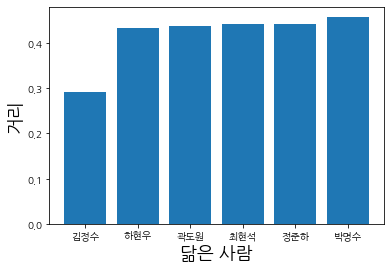

In [13]:
import matplotlib.font_manager as fm
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'
font_path = os.getenv('HOME')+'/aiffel/face_embedding/NanumGothic.ttf'
fontprop = fm.FontProperties(fname = font_path, size =18)

# obama와 가장 닮은 사람은 누굴까요?
get_nearest_face('나')
plt.bar(names, length_face)
plt.xlabel('닮은 사람',fontproperties=fontprop) # x label
plt.ylabel('거리', fontproperties=fontprop) # y label
plt.show()